In [ ]:
# 1 Write a program for pre-processing of a text document such as stop word removal, stemming.

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text document
with open('sample_text.txt', 'r') as file:
    text = file.read()

# Step 1: Tokenization
tokens = word_tokenize(text)

# Step 2: Stop Word Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Step 3: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Print the pre-processed text
print("Pre-processed text:")
print(' '.join(stemmed_tokens))




#----------------------------------------------
#stemming and lemmatization
#==============================================


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the path to the text document
document_path = 'sample_text.txt'

# Read the text document
with open(document_path, 'r') as file:
    text = file.read()

# Step 1: Tokenization
tokens = word_tokenize(text)

# Step 2: Stop Word Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Step 3: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Step 4: Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Convert tokens back to text
preprocessed_stemmed_text = ' '.join(stemmed_tokens)
preprocessed_lemmatized_text = ' '.join(lemmatized_tokens)

# Print the pre-processed text
print("Stemmed Text:")
print(preprocessed_stemmed_text)

print("\nLemmatized Text:")
print(preprocessed_lemmatized_text)


In [ ]:
#2 Implement a program for retrieval of documents using inverted files.

import os

class InvertedIndex:
    def __init__(self):
        self.index = {}

    def add_document(self, doc_id, content):
        words = content.split()
        for word in words:
            if word in self.index:
                if doc_id not in self.index[word]:
                    self.index[word].append(doc_id)
            else:
                self.index[word] = [doc_id]

    def search(self, query):
        query_words = query.split()
        result = set()

        if query_words[0] in self.index:
            result.update(self.index[query_words[0]])

        for word in query_words[1:]:
            if word in self.index:
                result = result.intersection(set(self.index[word]))

        return result

# Define the path to the folder containing documents
documents_folder = 'Untitled Folder/'

# Create an InvertedIndex
index = InvertedIndex()

# Iterate through the files in the folder
for filename in os.listdir(documents_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(documents_folder, filename), 'r') as file:
            content = file.read()
            doc_id = int(filename.split('.')[0])  # Extract document ID from filename
            index.add_document(doc_id, content)

# Perform searches
queries = ["first", "document", "second document", "mango", "banana"]
for query in queries:
    result = index.search(query)
    print(f"Documents containing '{query}': {result}")


In [ ]:
#3 Implement e-mail spam filtering using text classification algorithm with appropriate dataset.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'dataset.csv' with the actual file name)
data = pd.read_csv("emails.csv")

# Split the data into features (text) and target (spam)
X = data['text']
y = data['spam']

# Convert text to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = (accuracy_score(y_test, y_pred))

print("The accuracy of the trained model:", accuracy)

# Define a sample input
sample_input = ["hey lets catch up soon friend"]

# Preprocess the sample input using the same vectorizer
sample_input_vectorized = vectorizer.transform(sample_input)

# Make predictions on the sample input
sample_predictions = svm_classifier.predict(sample_input_vectorized)

print("Note, [0] for ham, [1] for SPAM email")

print("The sample email is identified as",sample_predictions)


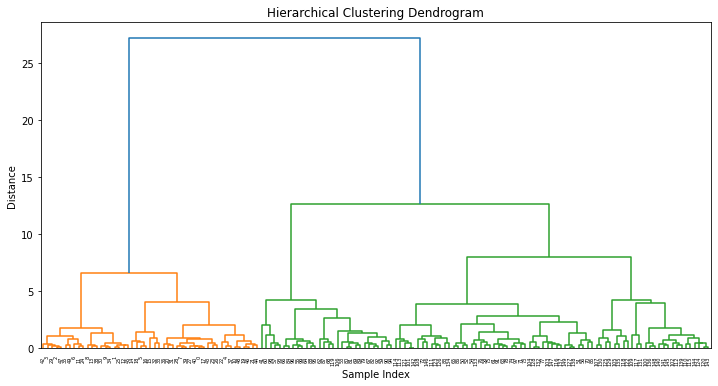

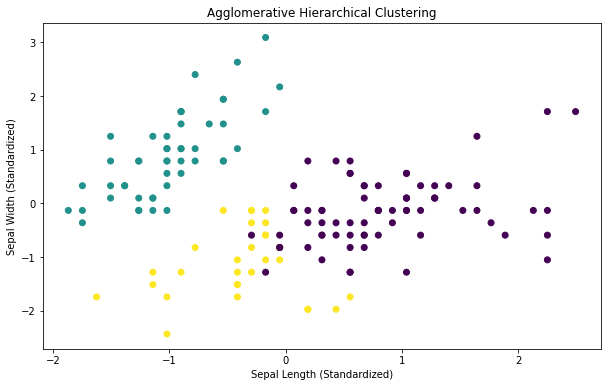

In [1]:
# 4 Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the Iris Data
iris = load_iris()
data = iris.data

# Step 2: Standardize the Data (Optional, but often recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = agglomerative.fit_predict(scaled_data)

# Step 4: Visualize the Dendrogram
Z = linkage(scaled_data, 'ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Step 5: Evaluate the Clustering Results (Optional)
# Use metrics like silhouette score, etc.

# Optional: Visualize the Clusters (2D Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()



In [2]:
# 5 Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).

import numpy as np

def pagerank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    num_nodes = len(graph)
    transition_matrix = np.zeros((num_nodes, num_nodes))

    for i, node in enumerate(graph):
        num_links = len(graph[node])
        for neighbor in graph[node]:
            j = list(graph.keys()).index(neighbor)
            transition_matrix[j, i] = 1 / num_links

    page_rank = np.ones(num_nodes) / num_nodes

    for _ in range(max_iterations):
        new_page_rank = (1 - damping_factor) / num_nodes + damping_factor * np.dot(transition_matrix, page_rank)

        if np.linalg.norm(new_page_rank - page_rank) < tolerance:
            break

        page_rank = new_page_rank

    return page_rank

# Define the new example graph
graph = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A']
}

# Calculate PageRank
result = pagerank(graph)
print("PageRank:", result)


PageRank: [0.27665873 0.15507966 0.28689782 0.28136378]


In [ ]:
# 6 Build the web crawler to pull product information and links from an e-commerce website.
